In [1]:
# misc
import pandas as pd
from pandas_profiling import ProfileReport
from pycaret.classification import *
import numpy as np
import re
import time
import math

# loader
from prepare_load import fastDescribe, distincValue
path = "../experiment/dat_filtered/dfilter-2019-2021.xlsx"
# prepared dataset
df_raw = pd.read_excel(path, sheet_name="dff_ini")
df_raw.head()

Month  Positif Harian  Vaksin 1  Vaksin 2  tpt KEPULAUAN SERIBU  \
0 2020-01-01               0       0.0       0.0              5.600833   
1 2020-02-01               0       0.0       0.0              5.761667   
2 2020-03-01             741       0.0       0.0              5.922500   
3 2020-04-01            3397       0.0       0.0              6.083333   
4 2020-05-01            3134       0.0       0.0              6.244167   

   tpt JAKARTA SELATAN  tpt JAKARTA TIMUR  tpt JAKARTA PUSAT  \
0             7.169167           6.411667           7.468333   
1             7.498333           6.673333           7.786667   
2             7.827500           6.935000           8.105000   
3             8.156667           7.196667           8.423333   
4             8.485833           7.458333           8.741667   

   tpt JAKARTA BARAT  tpt JAKARTA UTARA    CCI        MRT  Level  
0           5.798333           6.775833  120.7  2638464.0      1  
1           6.386667           7.231667  119.8  2564870.0      1  
2           6.975000           7.687500  115.5  1403638.0      1  
3           7.563333           8.143333   91.7   121578.0      2  
4           8.151667           8.599167   76.3    43544.0      2

In [2]:
profile = ProfileReport(df_raw, title="Pandas Profiling Report", explorative=True)
profile

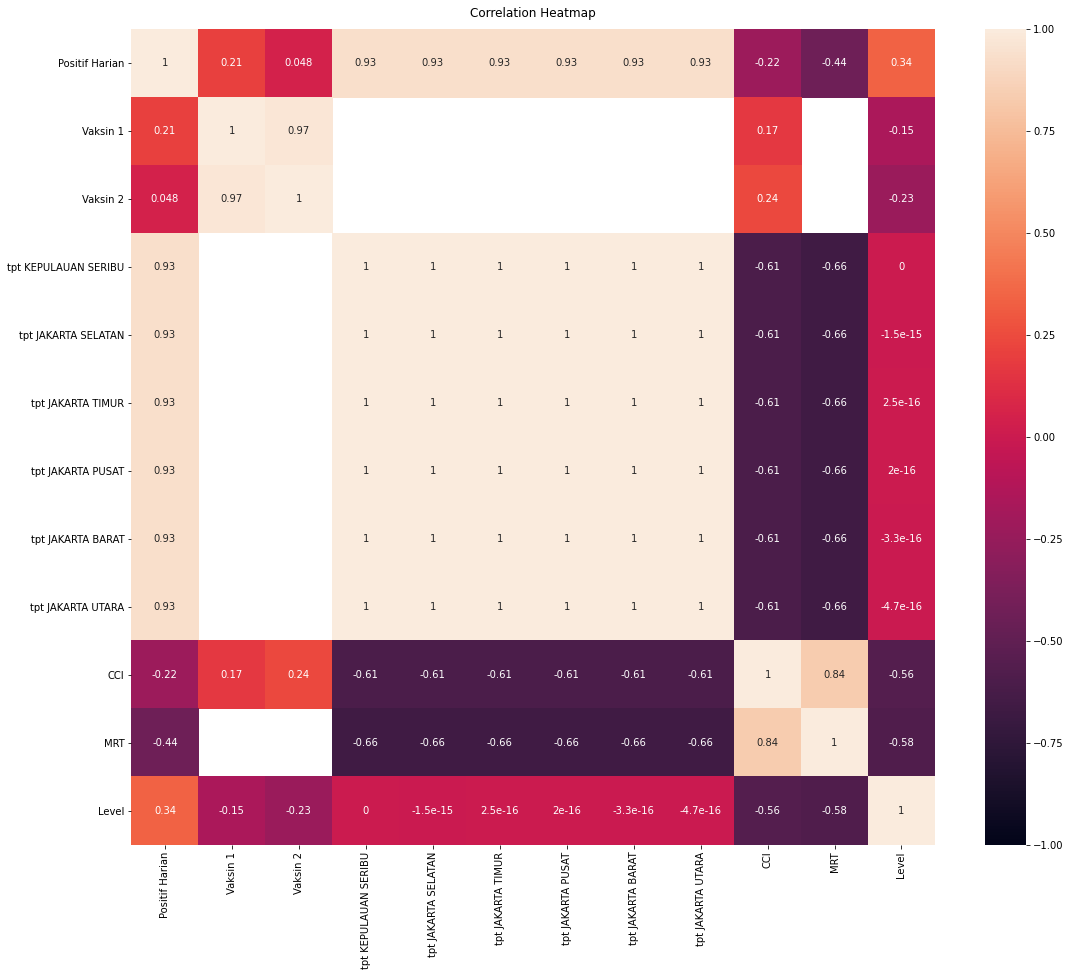

In [3]:
# visualize correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))

heatmap = sns.heatmap(df_raw.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [5]:
df_procc = df_raw.drop(['Month'], axis=1)
df_procc = df_procc.dropna()
md = setup(data = df_procc, target = 'Level', log_experiment = True, experiment_name = 'tnds-v1')

Setup Succesfully Completed!


In [11]:
### Try LR
from sklearn.linear_model import LinearRegression

#separate the other attributes from the predicting attribute
x = df_procc.drop('Level',axis=1)
#separte the predicting attribute into Y for model training 
y = df_procc['Level'].tolist()

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_prediction =  LR.predict(x_test)
y_prediction

array([1.65156993, 1.91887408, 0.78840615, 1.83559321])

In [13]:
predd = [round(item) for item in y_prediction]
print(predd, y_test)

[2.0, 2.0, 1.0, 2.0] [1, 1, 1, 2]


In [14]:
print("R^2: ", LR.score(x_train,y_train))

R^2:  0.9163288786437893
